<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/ANP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libreria **GeoPandas**

In [79]:
!pip show geopandas
import geopandas as gpd

Name: geopandas
Version: 0.13.2
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: fiona, packaging, pandas, pyproj, shapely
Required-by: bigframes, lida


AttributeError: ignored

Lectura de archovo de las áreas nacionales protegidas en México:

In [214]:
anp= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/datos/203_ANP_ITRF08_01092023.shp', encoding='utf-8')
#anp= gpd.read_file('zip:///content/drive/MyDrive/Colab Notebooks/datos/SHAPE_ANPS.zip!data', encoding='utf-8')

In [215]:
anp.head()

,ID_ANP,NOMBRE,CAT_MANEJO,ESTADOS,MUNICIPIOS,REGION,SUPERFICIE,S_TERRES,S_MARINA,PRIM_DEC,ULT_DOF,PCM1,SINAP,geometry
0,2.1.01.104,Alto Golfo de California y Delta del Río Colorado,RB,Baja California y Sonora,Baja California.: Mexicali; Sonora: Puerto Peñ...,Noroeste y Alto Golfo de California,934756.25000,407147.54560,527608.70440,1993-06-10,1993-06-10,25/09/2009,SINAP,"POLYGON ((-114.26471 31.74468, -114.25005 31.7..."
1,1.3.05.156,Zona marina del Archipiélago de San Lorenzo,PN,Baja California,Frente a las costas de Ensenada,Península de Baja California y Pacífico Norte,58442.80454,0.00000,58442.80454,2005-04-25,2005-04-25,20/01/2015,SINAP,"POLYGON ((-112.91739 28.93355, -112.91739 28.7..."
2,1.1.06.162,"Zona marina Bahía de los Ángeles, canales de B...",RB,Baja California,Frente al municipio de Ensenada,Península de Baja California y Pacífico Norte,387956.88420,483.20050,387473.68370,2007-06-05,2007-06-05,05/11/2013,SINAP,"POLYGON ((-113.52961 29.62456, -113.33897 29.4..."
3,9.7.04.159,Bala'an K'aax,APFF,"Quintana Roo, Yucatán y Campeche",Quintana Roo: Bacalar y José María Morelos; Yu...,Península de Yucatán y Caribe Mexicano,128390.15550,128390.15550,0.00000,2005-05-03,2005-05-03,25/02/2011,SINAP,"POLYGON ((-89.23003 19.69333, -89.24004 19.678..."
4,1.7.03.176,Balandra,APFF,Baja California Sur,La Paz,Península de Baja California y Pacífico Norte,2512.73075,1319.52959,1193.20116,2012-11-30,2012-11-30,29/10/2015,None,"MULTIPOLYGON (((-110.31197 24.26154, -110.3114..."


¿Cuántas áreas naturales protegidas por estado hay?

In [222]:
anp['ESTADOS']=anp['ESTADOS'].replace({'Queretaro':'Querétaro'})

In [221]:
anp_estados=anp['ESTADOS'].value_counts()
anp_estados.sort_index()

Aguascalientes y Zacatecas                               1
Aguascalientes, Jalisco, Durango, Nayarit y Zacatecas    1
B.C., B.C.S., Sonora y Sinaloa                           1
Baja California                                          7
Baja California Sur                                      8
                                                        ..
Veracruz                                                 4
Veracruz y Puebla                                        2
Yucatán                                                  3
Yucatán y Quintana Roo                                   1
Zacatecas                                                1
Name: ESTADOS, Length: 65, dtype: int64

cómo podemos ver, existen áreas naturales protegidas (ANP) que se compaten entre estados.

¿Cuántas y cuáles áreas naturales protegidas tiene Querétaro?

In [223]:
Q=anp_estados[anp_estados.index == 'Querétaro']
anp_Q= anp[anp['ESTADOS']=='Querétaro']
print('El estado de Querétaro tiene ',Q[0],' ANP')
#print('esta esta úbicada en el municipio de ',anp_Q['MUNICIPIOS'],' y se le nombra como ',anp_Q['NOMBRE'],sep='\n')

El estado de Querétaro tiene  3  ANP


sin embargo, estas 3 ANP son únicas de este estado. Faltan las que comparte con otros estados

In [266]:
anp_q=anp[anp['ESTADOS'].str.contains('quer',case=False) == True]
#anp_q['Nom']=anp_q['ESTADOS'].str.split(' y ')
anp_q.head()

,ID_ANP,NOMBRE,CAT_MANEJO,ESTADOS,MUNICIPIOS,REGION,SUPERFICIE,S_TERRES,S_MARINA,PRIM_DEC,ULT_DOF,PCM1,SINAP,geometry
21,6.3.11.019,Cerro de Las Campanas,PN,Querétaro,Querétaro,Centro y Eje Neovolcánico,58.493283,58.493283,0.0,1937-07-07,1937-07-07,None,None,"POLYGON ((-100.40957 20.58918, -100.41197 20.5..."
33,6.3.26.070,El Cimatario,PN,Querétaro,"Querétaro, Corregidora, El Marqués y Huimilpan",Centro y Eje Neovolcánico,2447.874000,2447.874000,0.0,1982-07-21,1982-07-21,None,None,"POLYGON ((-100.36137 20.55428, -100.36025 20.5..."
87,6.1.06.160,Sierra Gorda de Guanajuato,RB,Guanajuato y Querétaro,"Guanajuato: Atarjea, San Luis de La Paz, Santa...",Centro y Eje Neovolcánico,236882.763200,236882.763200,0.0,2007-02-02,2007-02-02,None,SINAP,"POLYGON ((-99.77397 21.48811, -99.77378 21.488..."
106,6.1.01.125,Sierra Gorda,RB,"Querétaro, Guanajuato, San Luis Potosí e Hidalgo","Qro: Arroyo Seco, Jalpan de Serra, Landa de Ma...",Centro y Eje Neovolcánico,383567.448800,383567.448800,0.0,1997-05-19,1997-05-19,08/05/2000,SINAP,"POLYGON ((-99.20951 21.66734, -99.20867 21.667..."
185,6.6.03.187,Peña Colorada,APRN,Querétaro,Querétaro y El Marqués,Centro y Eje Neovolcánico,4843.597312,4843.597312,0.0,2023-05-08,2023-05-08,None,None,"POLYGON ((-100.38403 20.75711, -100.38422 20.7..."


En total, en el estado existen 5 ANP, dódne dos de ellas colindan con otros estados.

Explorando GeoPandas:

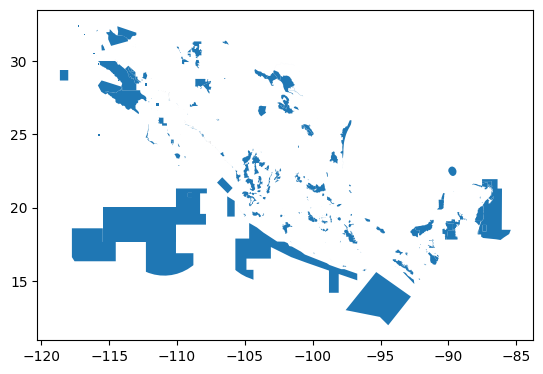

In [251]:
ax=anp.plot()

In [225]:
!pip install contextily
import contextily as cx

In [256]:
anp.crs

<Geographic 2D CRS: GEOGCS["GCS_MEXICO_ITRF_2008",DATUM["International ...>
Name: GCS_MEXICO_ITRF_2008
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: International_Terrestrial_Reference_Frame_2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [257]:
df_wm = anp.to_crs(epsg=3857)

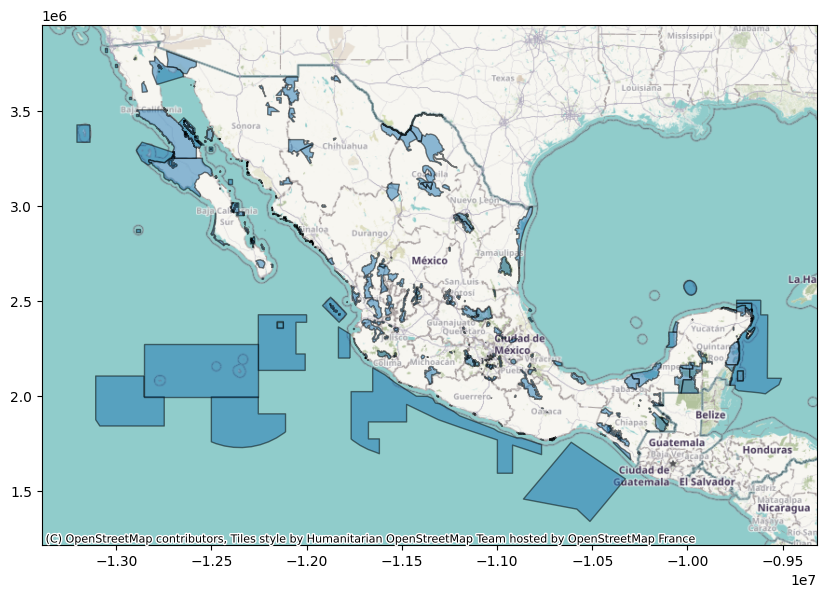

In [254]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

Ahora las ANP de Quétaro

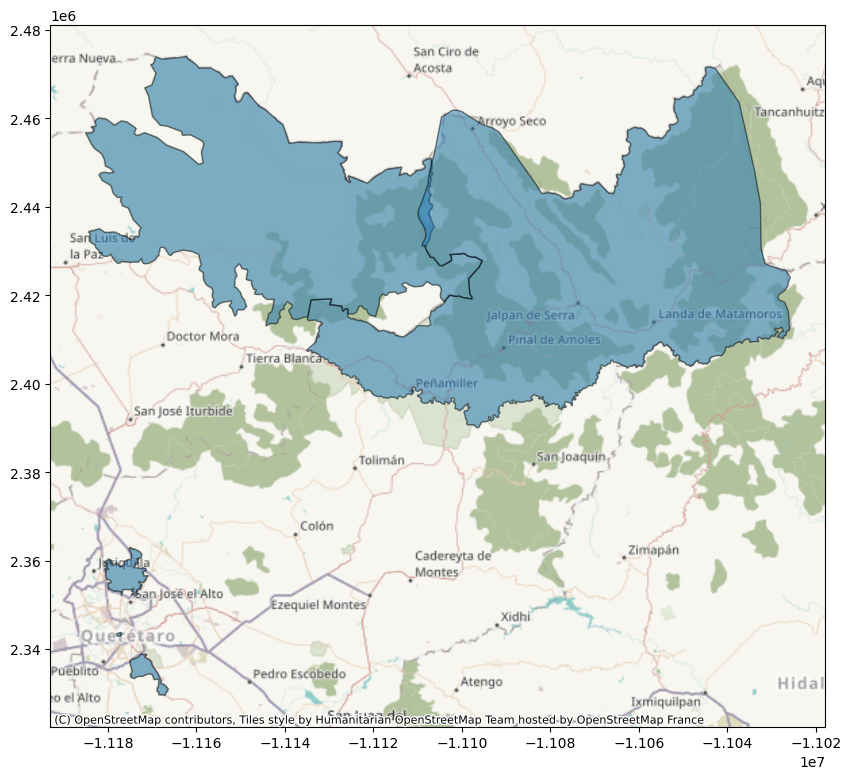

In [272]:
df_q = anp_q.to_crs(epsg=3857)
ax = df_q.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

Y si agregamos la ubicación de la Peña de Bernal

In [262]:
anp_qp=anp_q

In [260]:
from shapely.geometry import Point, Polygon
p_bernal=[None, 'Peña de Bernal', 'Paisaje Protegido', 'Querétaro', 'Ezequiel Montes y Tolimán', 'REGION',
       263.91, 263.91, 0, '2009-06-5', '2009-06-5', None,
       None, Point([-99.94564,20.74966])]
p={}
for i in range(len(anp_q.keys())-1):
  p[anp_q.keys()[i]]=[p_bernal[i]]

In [263]:
anp_qp.loc[5]=p_bernal

<ipython-input-263-4746bee346bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anp_qp.loc[5]=p_bernal


In [265]:
anp_qp

,ID_ANP,NOMBRE,CAT_MANEJO,ESTADOS,MUNICIPIOS,REGION,SUPERFICIE,S_TERRES,S_MARINA,PRIM_DEC,ULT_DOF,PCM1,SINAP,geometry
21,6.3.11.019,Cerro de Las Campanas,PN,Querétaro,Querétaro,Centro y Eje Neovolcánico,58.493283,58.493283,0.0,1937-07-07,1937-07-07,None,None,"POLYGON ((-100.40957 20.58918, -100.41197 20.5..."
33,6.3.26.070,El Cimatario,PN,Querétaro,"Querétaro, Corregidora, El Marqués y Huimilpan",Centro y Eje Neovolcánico,2447.874000,2447.874000,0.0,1982-07-21,1982-07-21,None,None,"POLYGON ((-100.36137 20.55428, -100.36025 20.5..."
87,6.1.06.160,Sierra Gorda de Guanajuato,RB,Guanajuato y Querétaro,"Guanajuato: Atarjea, San Luis de La Paz, Santa...",Centro y Eje Neovolcánico,236882.763200,236882.763200,0.0,2007-02-02,2007-02-02,None,SINAP,"POLYGON ((-99.77397 21.48811, -99.77378 21.488..."
106,6.1.01.125,Sierra Gorda,RB,"Querétaro, Guanajuato, San Luis Potosí e Hidalgo","Qro: Arroyo Seco, Jalpan de Serra, Landa de Ma...",Centro y Eje Neovolcánico,383567.448800,383567.448800,0.0,1997-05-19,1997-05-19,08/05/2000,SINAP,"POLYGON ((-99.20951 21.66734, -99.20867 21.667..."
185,6.6.03.187,Peña Colorada,APRN,Querétaro,Querétaro y El Marqués,Centro y Eje Neovolcánico,4843.597312,4843.597312,0.0,2023-05-08,2023-05-08,None,None,"POLYGON ((-100.38403 20.75711, -100.38422 20.7..."
5,None,Peña de Bernal,Paisaje Protegido,Querétaro,Ezequiel Montes y Tolimán,REGION,263.910000,263.910000,0.0,2009-06-5,2009-06-5,None,None,POINT (-99.94564 20.74966)


In [268]:
anp_q.crs

<Geographic 2D CRS: GEOGCS["GCS_MEXICO_ITRF_2008",DATUM["International ...>
Name: GCS_MEXICO_ITRF_2008
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: International_Terrestrial_Reference_Frame_2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [269]:
anp_qp.crs=anp_q.crs

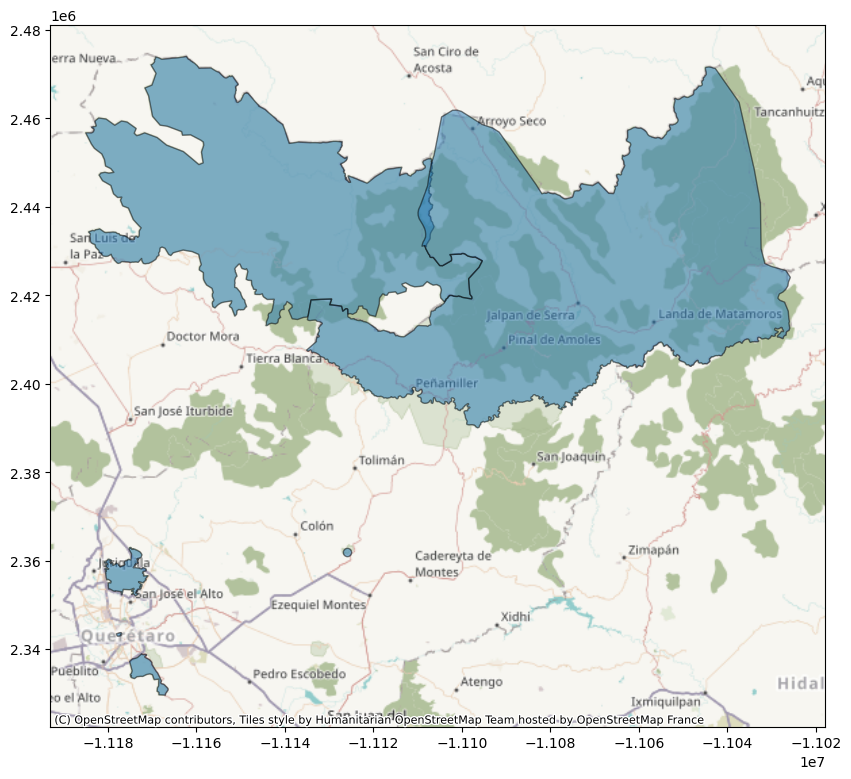

In [273]:
df_q = anp_qp.to_crs(epsg=3857)
ax = df_q.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)